# Fake News Datasets

## Introduction
This Jupyter Notebook was created to show basic analysis of public datasets with data for **fake news detection**. Main idea is to make this analysis replicable, so everyone can add his own analysis to those datasets.

## Processed datasets
In this project, following datasets are processed:
* Fake News | Kaggle
* Getting real about Fake News | Kaggle
* Fake News detection | Kaggle
* GeorgeMcIntire/fake_real_news_dataset
* FakeNewsChallenge
* BuzzFeedNews Facebook Facts
* LIAR
* OpenSources
* FakeNewsCorpus
* FakeNewsNet
* HoaxDataset


## Datasets

### Setup and import libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1 Fake News | Kaggle
Link: [https://www.kaggle.com/c/fake-news](https://www.kaggle.com/c/fake-news)

**Note:** Repository contains 2 files, **train** and **test** files, but **test** file does not contain labels.

#### 1.0 Attributes
* **id** - unique ID for a news article
* **title** - the title of a news article
* **author** - author of the news article
* **text** - the text of the article; could be incomplete
* **label** - a label that marks the article as potentially unreliable
    * unreliable
    * reliable

#### 1.1 Read the data

In [3]:
# read data from dataset
dataset = pd.read_csv('fake_news_kaggle/data/train.csv')
dataset_test = pd.read_csv('fake_news_kaggle/data/test.csv')

#### 1.2 Count of records

In [4]:
# train dataset
len(dataset)

20800

In [5]:
# test dataset
len(dataset_test)

5200

#### 1.3 Examples of the data
Check first 5 records:

In [6]:
# train dataset
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


Check last 5 records:

In [7]:
# train dataset
dataset.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


#### 1.4 More information about the data
Check datatypes of columns in the data:

In [8]:
# train dataset
dataset.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

Datatype 'object' means, that the data at that column contain string or other datatype, which can't be used in machine learning without other feature transformation.

In [9]:
# train dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
id        20800 non-null int64
title     20242 non-null object
author    18843 non-null object
text      20761 non-null object
label     20800 non-null int64
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


Check some interesting values for each column:

In [10]:
# train dataset
dataset.describe(include='all')

,id,title,author,text,label
count,20800.000000,20242,18843,20761,20800.000000
unique,NaN,19803,4201,20386,NaN
top,NaN,The Dark Agenda Behind Globalism And Open Borders,Pam Key,,NaN
freq,NaN,5,243,75,NaN
mean,10399.500000,NaN,NaN,NaN,0.500625
std,6004.587135,NaN,NaN,NaN,0.500012
min,0.000000,NaN,NaN,NaN,0.000000
25%,5199.750000,NaN,NaN,NaN,0.000000
50%,10399.500000,NaN,NaN,NaN,1.000000
75%,15599.250000,NaN,NaN,NaN,1.000000


#### 1.5 NULL values in the data
Are there any null values in our dataset?

In [11]:
# train dataset
dataset.isnull().values.any()

True

In [12]:
# test dataset
dataset_test.isnull().values.any()

True

Look for the count of null values per column:

In [13]:
# train dataset
dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

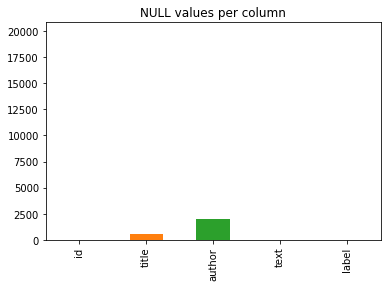

In [14]:
dataset.isnull().sum().plot(kind='bar', ylim=(0, len(dataset)), title='NULL values per column')

In [15]:
# test dataset
dataset_test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

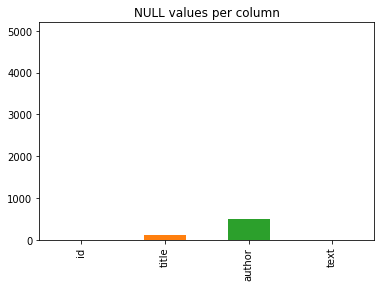

In [16]:
dataset_test.isnull().sum().plot(kind='bar', ylim=(0, len(dataset_test)), title='NULL values per column')

#### 1.6 Looking at attributes
What is the distribution of news labels?

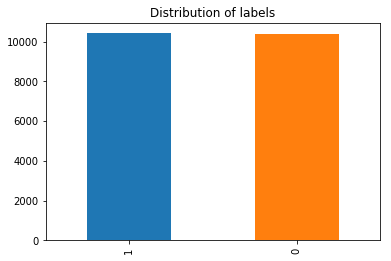

In [17]:
dataset['label'].value_counts().plot(kind='bar', title='Distribution of labels')

### 2 Getting real about Fake News | Kaggle
Link: [https://www.kaggle.com/mrisdal/fake-news](https://www.kaggle.com/mrisdal/fake-news)

The latest hot topic in the news is fake news and many are wondering what data scientists can do to detect it and stymie its viral spread. This dataset is only a first step in understanding and tackling this problem. It contains text and metadata scraped from 244 websites tagged as "bullshit" by the BS Detector Chrome Extension by Daniel Sieradski.

#### 2.0 Attributes
* **uuid** - unique identifier
* **ord_in_thread**
* **author** - author of story
* **published** - date published
* **title** - title of the story
* **text** - text of story
* **language** - data from webhose.io
* **crawled** - date the story was archived
* **site_url** - site URL from [BS detector](https://github.com/bs-detector/bs-detector/blob/dev/ext/data/data.json)
* **country** - data from webhose.io
* **domain_rank** - data from webhose.io
* **thread_title**
* **spam_score** - data from webhose.io
* **main_img_url** - image from story
* **replies_count** - number of replies
* **participants_count** - number of participants
* **likes** - number of Facebook likes
* **comments** - number of Facebook comments
* **shares** - number of Facebook shares
* **type** - type of website (label from [BS detector](https://github.com/bs-detector/bs-detector/blob/dev/ext/data/data.json))

#### 2.1 Read the data

In [18]:
# read data from dataset
dataset = pd.read_csv('getting_real_about_fake_news_kaggle/data/data.csv')

#### 2.2 Count of records

In [19]:
len(dataset)

12999

#### 2.3 Examples of the data
Check first 5 records:

In [20]:
dataset.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


Check last 5 records:

In [21]:
dataset.tail()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
12994,f1b5d0e44803f48732bde854a9fdf95837219b12,2,replaceme,2016-10-26T23:58:00.000+03:00,NaN,It DOES allow you to put a dog face on top of ...,english,2016-10-27T00:37:46.194+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.0,NaN,40,32,0,0,0,bs
12995,36011ceba3647e1bea78299b68b6fb705a1fc1ad,3,Freedumb,2016-10-27T00:02:00.000+03:00,NaN,Wait till you see what happens to the valuatio...,english,2016-10-27T00:37:46.220+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.0,NaN,40,32,0,0,0,bs
12996,6995d1aa9ac99926106489b14b5530e85358059a,4,major major maj...,2016-10-27T00:06:00.000+03:00,NaN,I'm waiting for the one that puts a pussy on m...,english,2016-10-27T00:37:46.244+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.0,NaN,40,32,0,0,0,bs
12997,7de8ae90eee164eb756db6c8a3772288e11d7a94,5,beemasters,2016-10-27T00:09:00.000+03:00,NaN,$4 Billion even after they are known to be kee...,english,2016-10-27T00:37:46.247+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.0,NaN,40,32,0,0,0,bs
12998,dabef7095b7d9dae6eb0d83c4cbb40b85efd7ae5,6,i&#039;m-confused,2016-10-27T00:09:00.000+03:00,NaN,of course - how else would they disceminate te...,english,2016-10-27T00:37:46.260+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.0,NaN,40,32,0,0,0,bs


#### 2.4 More information about the data
Check datatypes of columns in the data:

In [22]:
dataset.dtypes

uuid                   object
ord_in_thread           int64
author                 object
published              object
title                  object
text                   object
language               object
crawled                object
site_url               object
country                object
domain_rank           float64
thread_title           object
spam_score            float64
main_img_url           object
replies_count           int64
participants_count      int64
likes                   int64
comments                int64
shares                  int64
type                   object
dtype: object

Datatype 'object' means, that the data at that column contain string or other datatype, which can't be used in machine learning without other feature transformation.

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 20 columns):
uuid                  12999 non-null object
ord_in_thread         12999 non-null int64
author                10575 non-null object
published             12999 non-null object
title                 12319 non-null object
text                  12953 non-null object
language              12999 non-null object
crawled               12999 non-null object
site_url              12999 non-null object
country               12823 non-null object
domain_rank           8776 non-null float64
thread_title          12987 non-null object
spam_score            12999 non-null float64
main_img_url          9356 non-null object
replies_count         12999 non-null int64
participants_count    12999 non-null int64
likes                 12999 non-null int64
comments              12999 non-null int64
shares                12999 non-null int64
type                  12999 non-null object
dtypes: float64(2

Check some interesting values for each column:

In [24]:
dataset.describe(include='all')

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
count,12999,12999.000000,10575,12999,12319,12953,12999,12999,12999,12823,8776.000000,12987,12999.000000,9356,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999
unique,12999,NaN,2259,11973,11698,12431,16,12997,244,24,NaN,11788,NaN,7684,NaN,NaN,NaN,NaN,NaN,8
top,6ff095476846e5f1f250564df3ffc84e403ccd76,NaN,admin,2016-10-27T03:00:00.000+03:00,Get Ready For Civil Unrest: Survey Finds That ...,,english,2016-10-26T22:16:26.842+03:00,dailystormer.com,US,NaN,WH Press Secretary Says Obama's Denial About C...,NaN,http://www.amren.com/wp-content/uploads/2014/0...,NaN,NaN,NaN,NaN,NaN,bs
freq,1,NaN,247,59,7,106,12403,2,100,10367,NaN,44,NaN,100,NaN,NaN,NaN,NaN,NaN,11492
mean,NaN,0.891530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38092.996582,NaN,0.026122,NaN,1.383183,1.727518,10.831833,0.038311,10.831833,NaN
std,NaN,6.486822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26825.487454,NaN,0.122889,NaN,9.656838,6.884239,79.798949,0.827335,79.798949,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,486.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17423.000000,NaN,0.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34478.000000,NaN,0.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60570.000000,NaN,0.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN


#### 2.5 NULL values in the data
Are there any null values in our dataset?

In [25]:
dataset.isnull().values.any()

True

Look for the count of null values per column:

In [26]:
dataset.isnull().sum()

uuid                     0
ord_in_thread            0
author                2424
published                0
title                  680
text                    46
language                 0
crawled                  0
site_url                 0
country                176
domain_rank           4223
thread_title            12
spam_score               0
main_img_url          3643
replies_count            0
participants_count       0
likes                    0
comments                 0
shares                   0
type                     0
dtype: int64

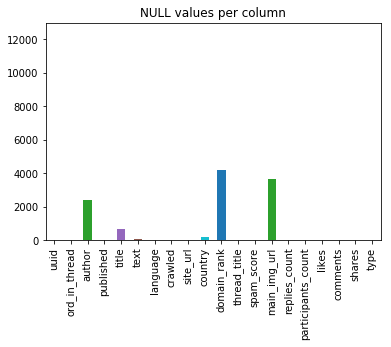

In [27]:
dataset.isnull().sum().plot(kind='bar', ylim=(0, len(dataset)), title='NULL values per column')

#### 2.6 Looking at attributes

**Labels**

What is the distribution of news labels?

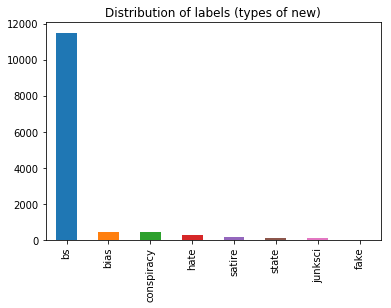

In [28]:
dataset.type.value_counts().plot(kind='bar', title='Distribution of labels (types of new)')

**Languages**

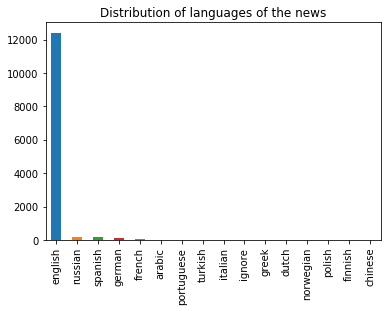

In [29]:
dataset.language.value_counts().plot(kind='bar', title='Distribution of languages of the news')

**Country**

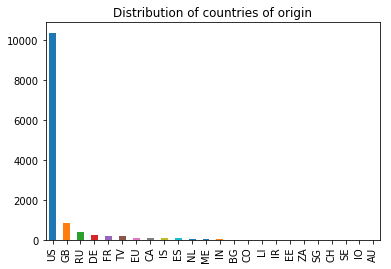

In [30]:
dataset.country.value_counts().plot(kind='bar', title='Distribution of countries of origin')

**Numerical attributes**

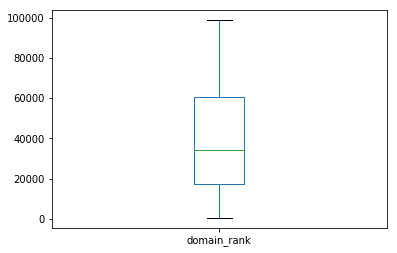

In [31]:
dataset.domain_rank.plot.box()

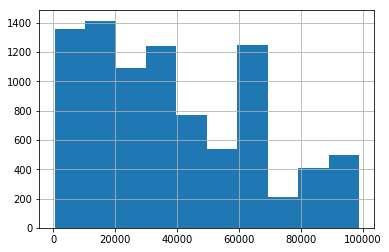

In [32]:
dataset.domain_rank.hist()

Because there are a lot of posts without likes, shares, comments, etc., boxplots of other numerical attributes will not tell us a lot of information about values density. Let's use histograms: 

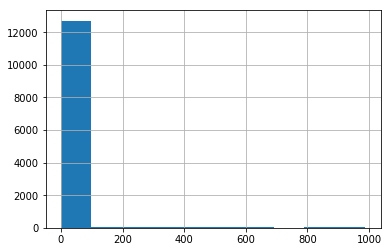

In [33]:
dataset.likes.hist()

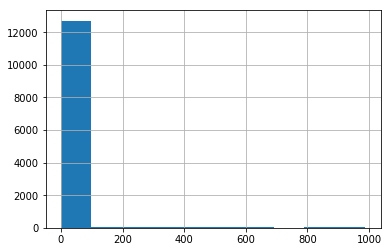

In [34]:
dataset.shares.hist()

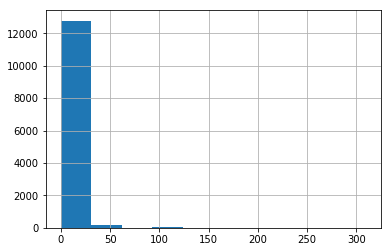

In [35]:
dataset.replies_count.hist()

Also, histogram are not showing some significant features in all numerical attributes.

#### 2.7 Pair analysis

At first, in pair analysis, correlation between numerical attributes can show something interesting:

In [36]:
dataset.corr()

,ord_in_thread,domain_rank,spam_score,replies_count,participants_count,likes,comments,shares
ord_in_thread,1.000000,-0.184794,-0.018859,0.830462,0.760739,-0.018657,-0.006365,-0.018657
domain_rank,-0.184794,1.000000,-0.027991,-0.174894,-0.177657,-0.201984,-0.076436,-0.201984
spam_score,-0.018859,-0.027991,1.000000,-0.007477,-0.019813,0.041199,-0.004444,0.041199
replies_count,0.830462,-0.174894,-0.007477,1.000000,0.971898,-0.019056,-0.006595,-0.019056
participants_count,0.760739,-0.177657,-0.019813,0.971898,1.000000,-0.020136,-0.008447,-0.020136
likes,-0.018657,-0.201984,0.041199,-0.019056,-0.020136,1.000000,0.158758,1.000000
comments,-0.006365,-0.076436,-0.004444,-0.006595,-0.008447,0.158758,1.000000,0.158758
shares,-0.018657,-0.201984,0.041199,-0.019056,-0.020136,1.000000,0.158758,1.000000


Let's use heatmap to see it better:

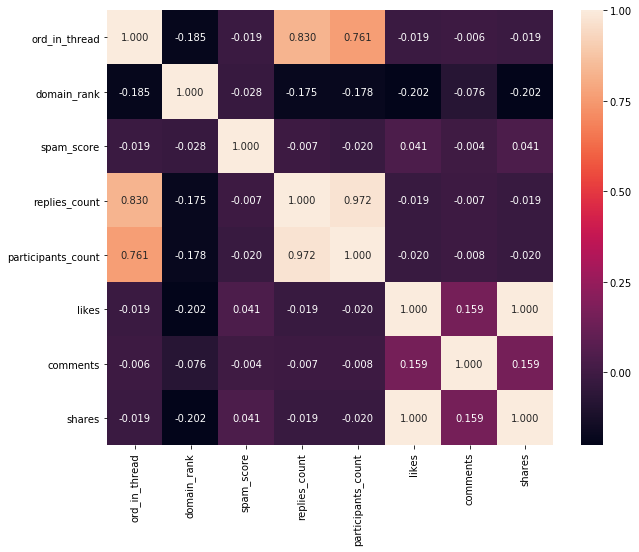

In [37]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(dataset.corr(), ax=ax, annot=True, fmt=".3f")

Heatmap shows, that there is only one real significant correlation, and it is between **participants_count** and **replies_count**.

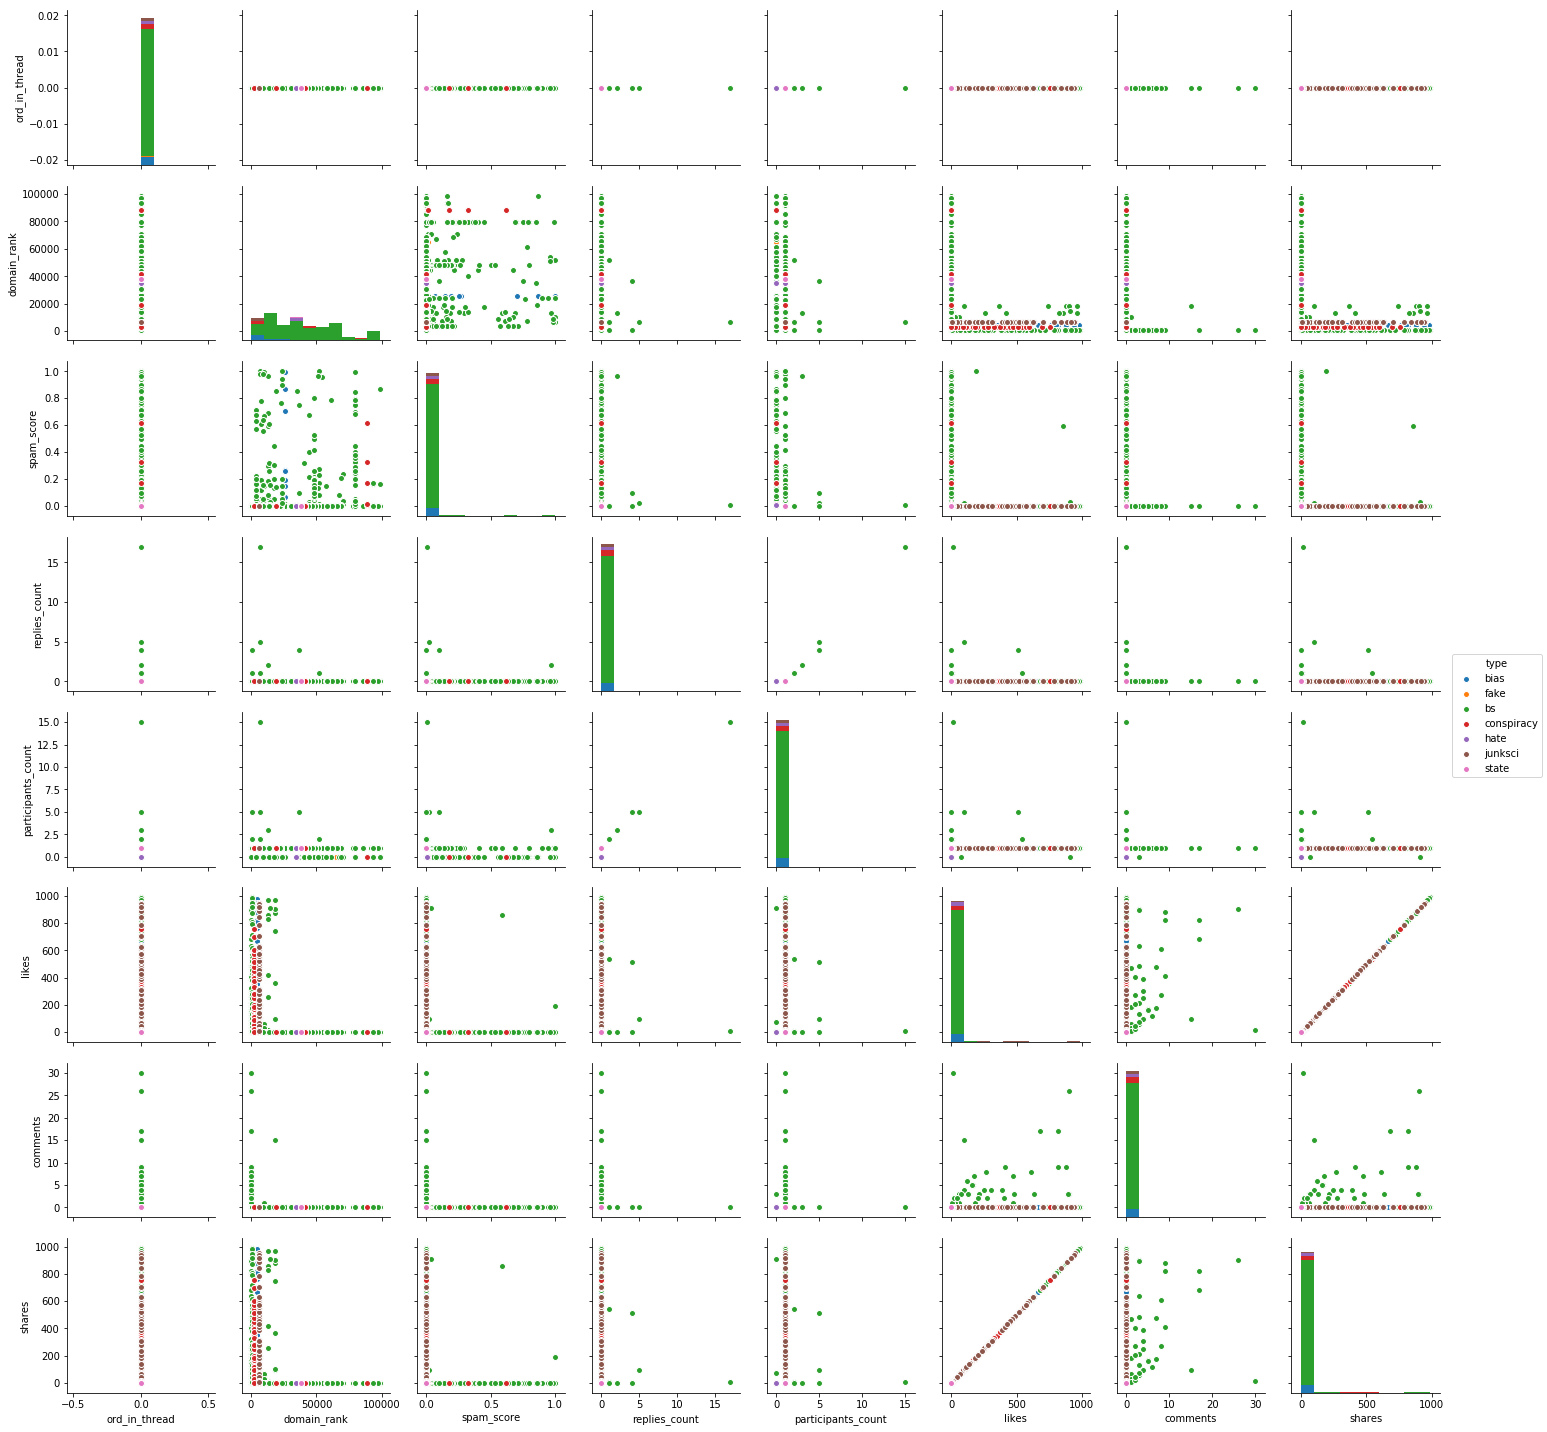

In [38]:
sns.pairplot(dataset.dropna(), hue='type')

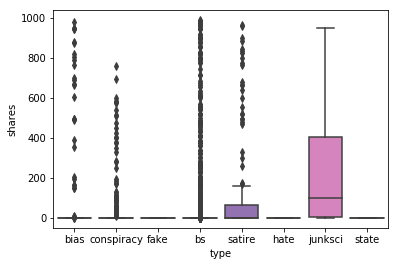

In [39]:
sns.boxplot('type', 'shares', data=dataset)

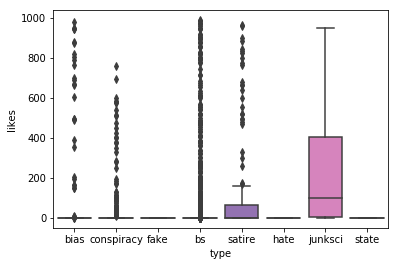

In [40]:
sns.boxplot('type', 'likes', data=dataset)

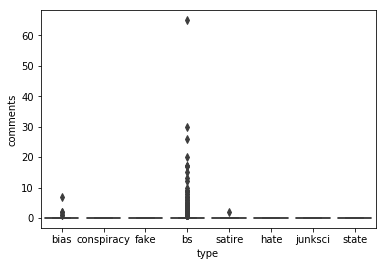

In [41]:
sns.boxplot('type', 'comments', data=dataset)

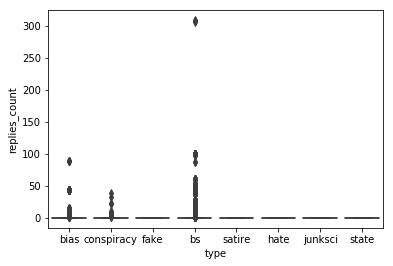

In [42]:
sns.boxplot('type', 'replies_count', data=dataset)

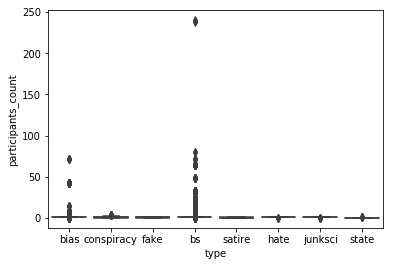

In [43]:
sns.boxplot('type', 'participants_count', data=dataset)

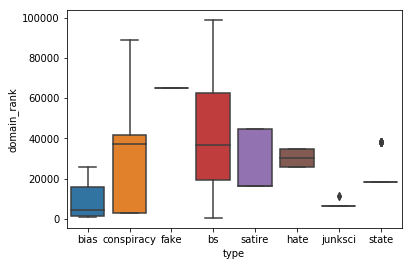

In [44]:
sns.boxplot('type', 'domain_rank', data=dataset)

### 3 Fake News detection | Kaggle
Link: [https://www.kaggle.com/jruvika/fake-news-detection](https://www.kaggle.com/jruvika/fake-news-detection)

#### 3.0 Attributes
* **URLs** - url where new is available
* **Headline** - headline of the new article
* **Body** - body of the new message
* **Label** - label, whether is new fake or real

#### 3.1 Read the data

In [45]:
# read data from dataset
dataset = pd.read_csv('fake_news_detection_kaggle/data/data.csv')

#### 3.2 Count of records

In [46]:
len(dataset)

4009

#### 3.3 Examples of the data
Check first 5 records:

In [47]:
dataset.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


Check last 5 records:

In [48]:
dataset.tail()

,URLs,Headline,Body,Label
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1
4008,http://beforeitsnews.com/u-s-politics/2017/10/...,Vice President Mike Pence Leaves NFL Game Beca...,Vice President Mike Pence Leaves NFL Game Beca...,0


#### 3.4 More information about the data
Check datatypes of columns in the data:

In [49]:
dataset.dtypes

URLs        object
Headline    object
Body        object
Label        int64
dtype: object

Datatype 'object' means, that the data at that column contain string or other datatype, which can't be used in machine learning without other feature transformation.

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
URLs        4009 non-null object
Headline    4009 non-null object
Body        3988 non-null object
Label       4009 non-null int64
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


Check some interesting values for each column:

In [51]:
dataset.describe(include='all')

,URLs,Headline,Body,Label
count,4009,4009,3988,4009.000000
unique,3352,2831,2863,NaN
top,http://beforeitsnews.com/u-s-politics/2017/10/...,10/4 Expo Park-Forbes Field Era: '08 To the Wi...,A Potato Battery Can Light up a Room for Over ...,NaN
freq,5,6,143,NaN
mean,NaN,NaN,NaN,0.466949
std,NaN,NaN,NaN,0.498969
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,1.000000


#### 3.5 NULL values in the data
Are there any null values in our dataset?

In [52]:
dataset.isnull().values.any()

True

Look for the count of null values per column:

In [53]:
dataset.isnull().sum()

URLs         0
Headline     0
Body        21
Label        0
dtype: int64

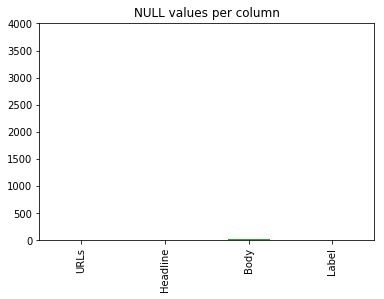

In [54]:
dataset.isnull().sum().plot(kind='bar', ylim=(0, len(dataset)), title='NULL values per column')

#### 3.6 Looking at attributes
What is the distribution of news labels?

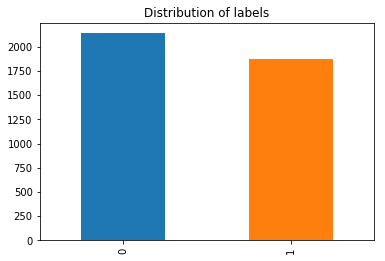

In [55]:
dataset['Label'].value_counts().plot(kind='bar', title='Distribution of labels')

### 4 GeorgeMcIntire/fake_real_news_dataset
Link: [https://github.com/GeorgeMcIntire/fake_real_news_dataset](https://github.com/GeorgeMcIntire/fake_real_news_dataset)



#### 4.0 Attributes
* **title** - title of the new
* **text** - text of the new
* **label** - label whether is new real or fake

#### 4.1 Read the data

In [56]:
# read data from dataset
dataset = pd.read_csv('georgemcintire_fake_real_news_dataset/data/data.csv')

#### 4.2 Count of records

In [57]:
len(dataset)

6335

#### 4.3 Examples of the data
Check first 5 records:

In [58]:
dataset.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


Check last 5 records:

In [59]:
dataset.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


#### 4.4 More information about the data
Check datatypes of columns in the data:

In [60]:
dataset.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

Datatype 'object' means, that the data at that column contain string or other datatype, which can't be used in machine learning without other feature transformation.

In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
Unnamed: 0    6335 non-null int64
title         6335 non-null object
text          6335 non-null object
label         6335 non-null object
dtypes: int64(1), object(3)
memory usage: 198.0+ KB


Check some interesting values for each column:

In [62]:
dataset.describe(include='all')

,Unnamed: 0,title,text,label
count,6335.000000,6335,6335,6335
unique,NaN,6256,6060,2
top,NaN,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,NaN,5,58,3171
mean,5280.415627,NaN,NaN,NaN
std,3038.503953,NaN,NaN,NaN
min,2.000000,NaN,NaN,NaN
25%,2674.500000,NaN,NaN,NaN
50%,5271.000000,NaN,NaN,NaN
75%,7901.000000,NaN,NaN,NaN


#### 4.5 NULL values in the data
Are there any null values in our dataset?

In [63]:
dataset.isnull().values.any()

False

There are no null values in this dataset.

#### 4.6 Looking at attributes
What is the distribution of news labels?

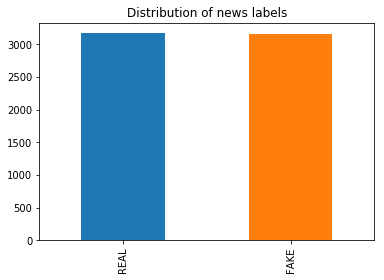

In [64]:
dataset.label.value_counts().plot(kind='bar', title='Distribution of news labels')

### 5 FakeNewsChallenge
Link: [https://github.com/FakeNewsChallenge/fnc-1](https://github.com/FakeNewsChallenge/fnc-1)

#### 5.0 Attributes

#### 5.1 Read the data

In [191]:
# read data from dataset
dataset = pd.read_csv('data/fake_news_challenge/train_stances.csv')
dataset_bodies = pd.read_csv('data/fake_news_challenge/train_bodies.csv')

#### 5.2 Count of records

In [192]:
len(dataset)

49972

#### 5.3 Examples of the data
Check first 5 records:

In [188]:
dataset.head()

,Body ID,articleBody
0,0,A small meteorite crashed into a wooded area i...
1,4,Last week we hinted at what was to come as Ebo...
2,5,(NEWSER) – Wonder how long a Quarter Pounder w...
3,6,"Posting photos of a gun-toting child online, I..."
4,7,At least 25 suspected Boko Haram insurgents we...


Check last 5 records:

In [189]:
dataset.tail()

,Body ID,articleBody
1678,2528,Intelligence agencies hunting for identity of ...
1679,2529,"While Daleks ""know no fear"" and ""must not fear..."
1680,2530,More than 200 schoolgirls were kidnapped in Ap...
1681,2531,A Guantanamo Bay prisoner released last year a...
1682,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic..."


#### 5.4 More information about the data
Check datatypes of columns in the data:

In [190]:
dataset.dtypes

Body ID         int64
articleBody    object
dtype: object

### 6 BuzzFeedNews Facebook Facts
Link: [https://github.com/BuzzFeedNews/2016-10-facebook-fact-check](https://github.com/BuzzFeedNews/2016-10-facebook-fact-check)

#### 6.0 Attributes
* **account_id** - id of account, which posted current post
* **post_id** - id of the post (unique id)
* **Category** - category of the post
    * mainstream
    * right
    * left
* **Page** - page, which posted current post (account_id attribute belongs to this attribute)
* **Post URL** - URL of the post
* **Date Published** - date, when the post was published
* **Post Type** - type of the post
    * link
    * image
    * photo
    * text
* **Rating** - rating, whether is post real or fake
    * mostly true
    * no factual content
    * mixture of true and false
    * mostly false
* **Debate** - whether there was debate
* **share_count** - count of shares of current post
* **reaction_count** - count of reactions of current post
* **comment_count** - count of comments of current post

#### 6.1 Read the data

In [65]:
# read data from dataset
dataset = pd.read_csv('buzzfeednews_facebook_facts/data/data.csv')

#### 6.2 Count of records

In [66]:
len(dataset)

2282

#### 6.3 Examples of the data
Check first 5 records:

In [67]:
dataset.head()

,account_id,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
0,184096565021911,1035057923259100,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,no factual content,NaN,NaN,146.0,15.0
1,184096565021911,1035269309904628,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,1.0,33.0,34.0
2,184096565021911,1035305953234297,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,34.0,63.0,27.0
3,184096565021911,1035322636565962,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,35.0,170.0,86.0
4,184096565021911,1035352946562931,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,NaN,568.0,3188.0,2815.0


Check last 5 records:

In [68]:
dataset.tail()

,account_id,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
2277,114517875225866,1472393822771591,left,The Other 98%,https://www.facebook.com/TheOther98/posts/1472...,2016-09-27,photo,no factual content,NaN,21563.0,33388.0,391.0
2278,114517875225866,1472419749435665,left,The Other 98%,https://www.facebook.com/TheOther98/posts/1472...,2016-09-27,link,mostly true,NaN,1451.0,4828.0,342.0
2279,114517875225866,1472551312755842,left,The Other 98%,https://www.facebook.com/TheOther98/posts/1472...,2016-09-27,link,mixture of true and false,NaN,8236.0,12083.0,856.0
2280,114517875225866,1472557792755194,left,The Other 98%,https://www.facebook.com/TheOther98/posts/1472...,2016-09-27,link,mostly true,yes,3985.0,12966.0,538.0
2281,114517875225866,1472655802745393,left,The Other 98%,https://www.facebook.com/TheOther98/posts/1472...,2016-09-27,photo,no factual content,NaN,24499.0,47312.0,1375.0


#### 6.4 More information about the data
Check datatypes of columns in the data:

In [69]:
dataset.dtypes

account_id          int64
post_id             int64
Category           object
Page               object
Post URL           object
Date Published     object
Post Type          object
Rating             object
Debate             object
share_count       float64
reaction_count    float64
comment_count     float64
dtype: object

Datatype 'object' means, that the data at that column contain string or other datatype, which can't be used in machine learning without other feature transformation.

In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 12 columns):
account_id        2282 non-null int64
post_id           2282 non-null int64
Category          2282 non-null object
Page              2282 non-null object
Post URL          2282 non-null object
Date Published    2282 non-null object
Post Type         2282 non-null object
Rating            2282 non-null object
Debate            298 non-null object
share_count       2212 non-null float64
reaction_count    2280 non-null float64
comment_count     2280 non-null float64
dtypes: float64(3), int64(2), object(7)
memory usage: 214.0+ KB


Check some interesting values for each column:

In [71]:
dataset.describe(include='all')

,account_id,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
count,2.282000e+03,2.282000e+03,2282,2282,2282,2282,2282,2282,298,2.212000e+03,2280.000000,2280.000000
unique,NaN,NaN,3,9,2282,7,4,4,1,NaN,NaN,NaN
top,NaN,NaN,mainstream,Politico,https://www.facebook.com/OccupyDemocrats/posts...,2016-09-26,link,mostly true,yes,NaN,NaN,NaN
freq,NaN,NaN,1145,536,1,403,1780,1669,298,NaN,NaN,NaN
mean,1.867111e+14,3.299586e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.044816e+03,5364.284649,516.102193
std,1.393826e+14,3.808724e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.983192e+04,19126.544561,3569.355445
min,6.231759e+10,5.510967e+14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,2.000000,0.000000
25%,1.145179e+14,1.247441e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.400000e+01,149.000000,37.000000
50%,1.840966e+14,1.290536e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.600000e+01,545.500000,131.500000
75%,3.469371e+14,1.540752e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.390000e+02,2416.750000,390.250000


#### 6.5 NULL values in the data
Are there any null values in our dataset?

In [72]:
dataset.isnull().values.any()

True

Look for the count of null values per column:

In [73]:
dataset.isnull().sum()

account_id           0
post_id              0
Category             0
Page                 0
Post URL             0
Date Published       0
Post Type            0
Rating               0
Debate            1984
share_count         70
reaction_count       2
comment_count        2
dtype: int64

#### 6.6 Looking at attributes

**Rating**

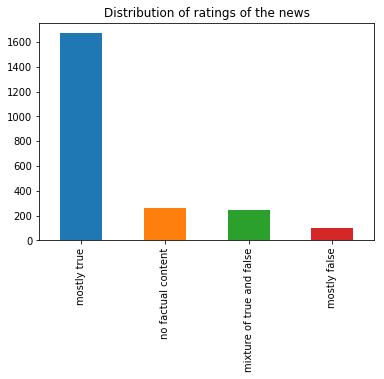

In [74]:
dataset.Rating.value_counts().plot(kind='bar', title='Distribution of ratings of the news')

**Category**

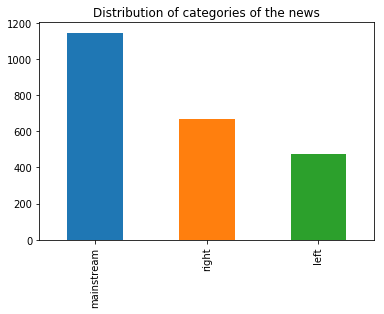

In [75]:
dataset.Category.value_counts().plot(kind='bar', title='Distribution of categories of the news')

**Page**

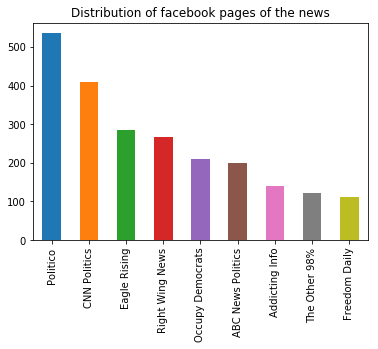

In [76]:
dataset.Page.value_counts().plot(kind='bar', title='Distribution of facebook pages of the news')

**Post type**

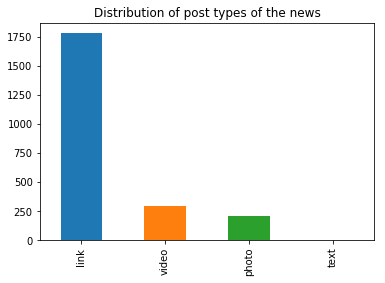

In [77]:
dataset['Post Type'].value_counts().plot(kind='bar', title='Distribution of post types of the news')

### 7 LIAR
Link: [https://www.cs.ucsb.edu/~william/data/liar_dataset.zip](https://www.cs.ucsb.edu/~william/data/liar_dataset.zip)

LIAR: A BENCHMARK DATASET FOR FAKE NEWS DETECTION
William Yang Wang, "Liar, Liar Pants on Fire": A New Benchmark Dataset for Fake News Detection, to appear in Proceedings of the 55th Annual Meeting of the Association for Computational Linguistics (ACL 2017), short paper, Vancouver, BC, Canada, July 30-August 4, ACL.

Note that we do not provide the full-text verdict report in this current version of the dataset,
but you can use the following command to access the full verdict report and links to the source documents:
wget http://www.politifact.com//api/v/2/statement/[ID]/?format=json

**Note:** This dataset contains 3 files, *test.tsv*, *train.tsv* and *valid.tsv*. 

#### 7.0 Attributes
* **Column 1** - the ID of the statement ([ID].json).
* **Column 2** - the label.
* **Column 3** - the statement.
* **Column 4** - the subject(s).
* **Column 5** - the speaker.
* **Column 6** - the speaker's job title.
* **Column 7** - the state info.
* **Column 8** - the party affiliation.
* **Column 9-13** - the total credit history count, including the current statement.
    * 9: barely true counts.
    * 10: false counts.
    * 11: half true counts.
    * 12: mostly true counts.
    * 13: pants on fire counts.
* **Column 14** - the context (venue / location of the speech or statement).

#### 7.1 Read the data

In [78]:
# column names
colnames = ['ID', 'label', 'statement', 'subject', 'speaker', 'speaker_job', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context']

# read data from dataset
dataset = pd.read_csv('liar/data/train.tsv', sep='\t', header=None, names=colnames)
dataset_test = pd.read_csv('liar/data/test.tsv', sep='\t', header=None, names=colnames)
dataset_valid = pd.read_csv('liar/data/valid.tsv', sep='\t', header=None, names=colnames)

#### 7.2 Count of records

In [79]:
# train dataset
len(dataset)

10240

In [80]:
# test dataset
len(dataset_test)

1267

In [81]:
# valid dataset
len(dataset_valid)

1284

#### 7.3 Examples of the data

Check first 5 records:

In [82]:
# train dataset
dataset.head()

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


Check last 5 records:

In [83]:
# train dataset
dataset.tail()

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
10235,5473.json,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report"""
10236,3408.json,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview
10237,3959.json,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate
10238,2253.json,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...
10239,1155.json,pants-fire,The Department of Veterans Affairs has a manua...,"health-care,veterans",michael-steele,chairman of the Republican National Committee,Maryland,republican,0.0,1.0,1.0,0.0,2.0,a Fox News interview


#### 7.4 More information about the data

In [84]:
# train dataset
dataset.dtypes

ID                       object
label                    object
statement                object
subject                  object
speaker                  object
speaker_job              object
state_info               object
party_affiliation        object
barely_true_counts      float64
false_counts            float64
half_true_counts        float64
mostly_true_counts      float64
pants_on_fire_counts    float64
context                  object
dtype: object

Datatype 'object' means, that the data at that column contain string or other datatype, which can't be used in machine learning without other feature transformation.

In [85]:
# train dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
ID                      10240 non-null object
label                   10240 non-null object
statement               10240 non-null object
subject                 10238 non-null object
speaker                 10238 non-null object
speaker_job             7343 non-null object
state_info              8032 non-null object
party_affiliation       10238 non-null object
barely_true_counts      10238 non-null float64
false_counts            10238 non-null float64
half_true_counts        10238 non-null float64
mostly_true_counts      10238 non-null float64
pants_on_fire_counts    10238 non-null float64
context                 10138 non-null object
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


Check some interesting values for each column:

In [86]:
# train dataset
dataset.describe(include='all')

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
count,10240,10240,10240,10238,10238,7343,8032,10238,10238.000000,10238.000000,10238.000000,10238.000000,10238.000000,10138
unique,10240,6,10223,3827,2910,1184,84,23,NaN,NaN,NaN,NaN,NaN,4345
top,4494.json,half-true,On changing the rules for filibusters on presi...,health-care,barack-obama,President,Texas,republican,NaN,NaN,NaN,NaN,NaN,a news release
freq,1,2114,3,381,488,492,1009,4497,NaN,NaN,NaN,NaN,NaN,241
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.533210,13.286482,17.133718,16.434265,6.201407,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.973764,24.112936,35.846511,36.151688,16.128927,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,3.000000,3.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,12.000000,13.000000,11.000000,5.000000,NaN


#### 7.5 NULL values in the data

Are there any null values in our dataset?

In [87]:
# train dataset
dataset.isnull().values.any()

True

In [88]:
# test dataset
dataset_test.isnull().values.any()

True

In [89]:
# valid dataset
dataset_valid.isnull().values.any()

True

Look for the count of null values per column:

In [90]:
# train dataset
dataset.isnull().sum()

ID                         0
label                      0
statement                  0
subject                    2
speaker                    2
speaker_job             2897
state_info              2208
party_affiliation          2
barely_true_counts         2
false_counts               2
half_true_counts           2
mostly_true_counts         2
pants_on_fire_counts       2
context                  102
dtype: int64

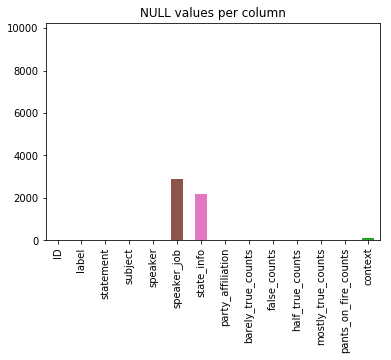

In [91]:
dataset.isnull().sum().plot(kind='bar', ylim=(0, len(dataset)), title='NULL values per column')

In [92]:
# test dataset
dataset_test.isnull().sum()

ID                        0
label                     0
statement                 0
subject                   0
speaker                   0
speaker_job             325
state_info              262
party_affiliation         0
barely_true_counts        0
false_counts              0
half_true_counts          0
mostly_true_counts        0
pants_on_fire_counts      0
context                  17
dtype: int64

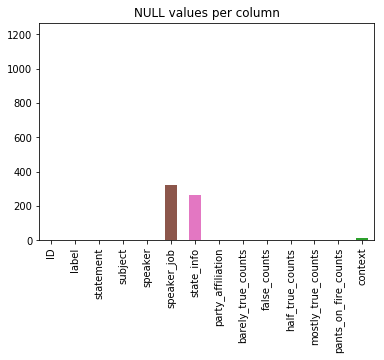

In [93]:
dataset_test.isnull().sum().plot(kind='bar', ylim=(0, len(dataset_test)), title='NULL values per column')

In [94]:
# valid dataset
dataset_valid.isnull().sum()

ID                        0
label                     0
statement                 0
subject                   0
speaker                   0
speaker_job             345
state_info              279
party_affiliation         0
barely_true_counts        0
false_counts              0
half_true_counts          0
mostly_true_counts        0
pants_on_fire_counts      0
context                  12
dtype: int64

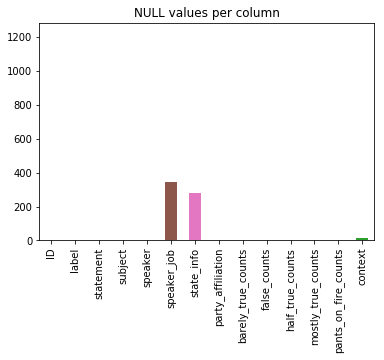

In [95]:
dataset_valid.isnull().sum().plot(kind='bar', ylim=(0, len(dataset_valid)), title='NULL values per column')

#### 7.6 Looking at attributes

**Label**

At first, check what labels are available:

In [96]:
dataset.label.unique()

array(['false', 'half-true', 'mostly-true', 'true', 'barely-true',
       'pants-fire'], dtype=object)

Check distribution of labels:

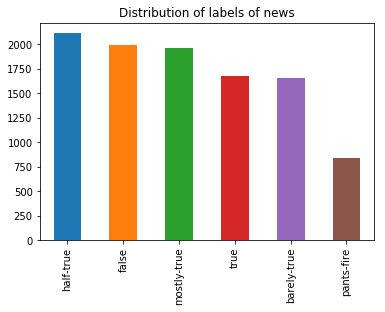

In [97]:
dataset.label.dropna().value_counts().plot(kind='bar', title='Distribution of labels of news')

**Party affiliation**

In [98]:
dataset.party_affiliation.unique()

array(['republican', 'democrat', 'none', 'organization', 'independent',
       'columnist', 'activist', 'talk-show-host', 'libertarian',
       'newsmaker', 'journalist', 'labor-leader', 'state-official',
       'business-leader', 'education-official', 'tea-party-member', nan,
       'green', 'liberal-party-canada', 'government-body', 'Moderate',
       'democratic-farmer-labor', 'ocean-state-tea-party-action',
       'constitution-party'], dtype=object)

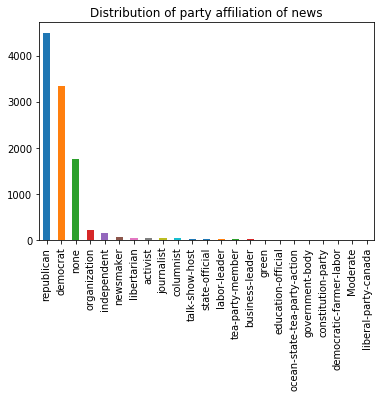

In [99]:
dataset.party_affiliation.dropna().value_counts().plot(kind='bar', title='Distribution of party affiliation of news')

**Numerical attributes**
To check values density, boxplots and histograms would be interesting:

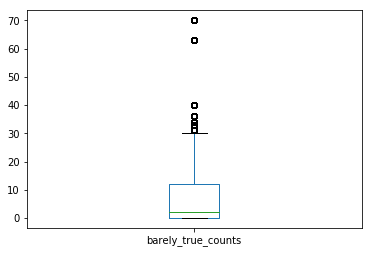

In [100]:
dataset.barely_true_counts.plot.box()

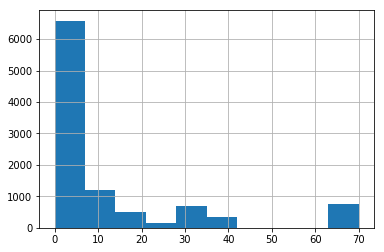

In [101]:
dataset.barely_true_counts.hist()

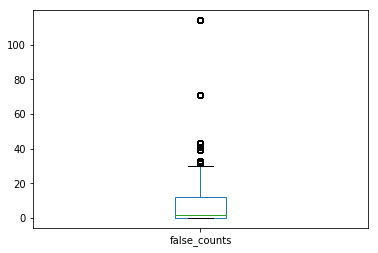

In [102]:
dataset.false_counts.plot.box()

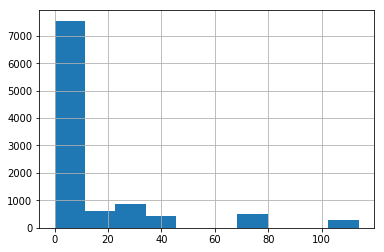

In [103]:
dataset.false_counts.hist()

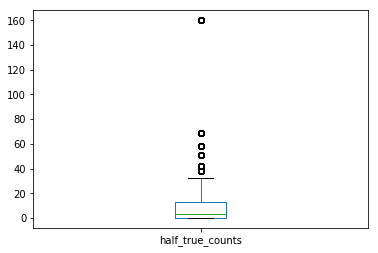

In [104]:
dataset.half_true_counts.plot.box()

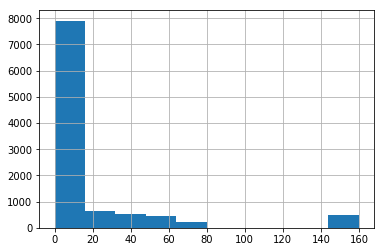

In [105]:
dataset.half_true_counts.hist()

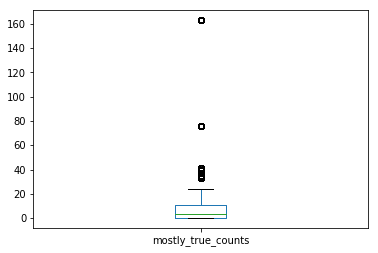

In [106]:
dataset.mostly_true_counts.plot.box()

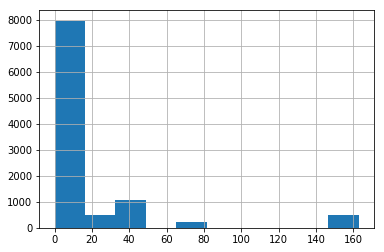

In [107]:
dataset.mostly_true_counts.hist()

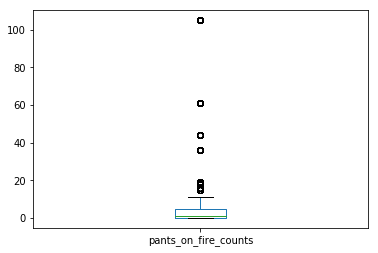

In [108]:
dataset.pants_on_fire_counts.plot.box()

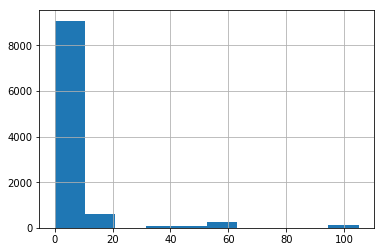

In [109]:
dataset.pants_on_fire_counts.hist()

Boxplots showed that there are a lot of outliers in our numerical data (a lot of extremes, that can influence characteristics like mean, etc.).

#### 7.7 Pair analysis

At first, in pair analysis, correlation between numerical attributes can show something interesting:

In [110]:
dataset.corr()

,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts
barely_true_counts,1.000000,0.921735,0.912794,0.881853,0.424533
false_counts,0.921735,1.000000,0.756752,0.709579,0.652990
half_true_counts,0.912794,0.756752,1.000000,0.987452,0.217231
mostly_true_counts,0.881853,0.709579,0.987452,1.000000,0.157133
pants_on_fire_counts,0.424533,0.652990,0.217231,0.157133,1.000000


Let's use heatmap to see it better:

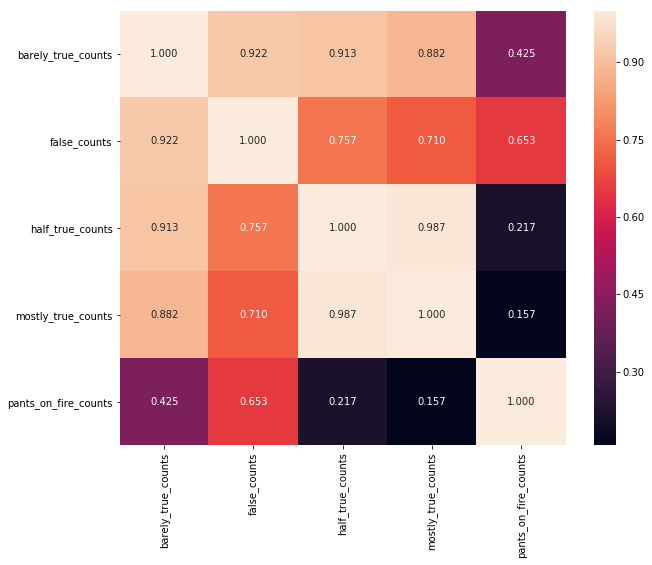

In [111]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(dataset.corr(), ax=ax, annot=True, fmt=".3f")

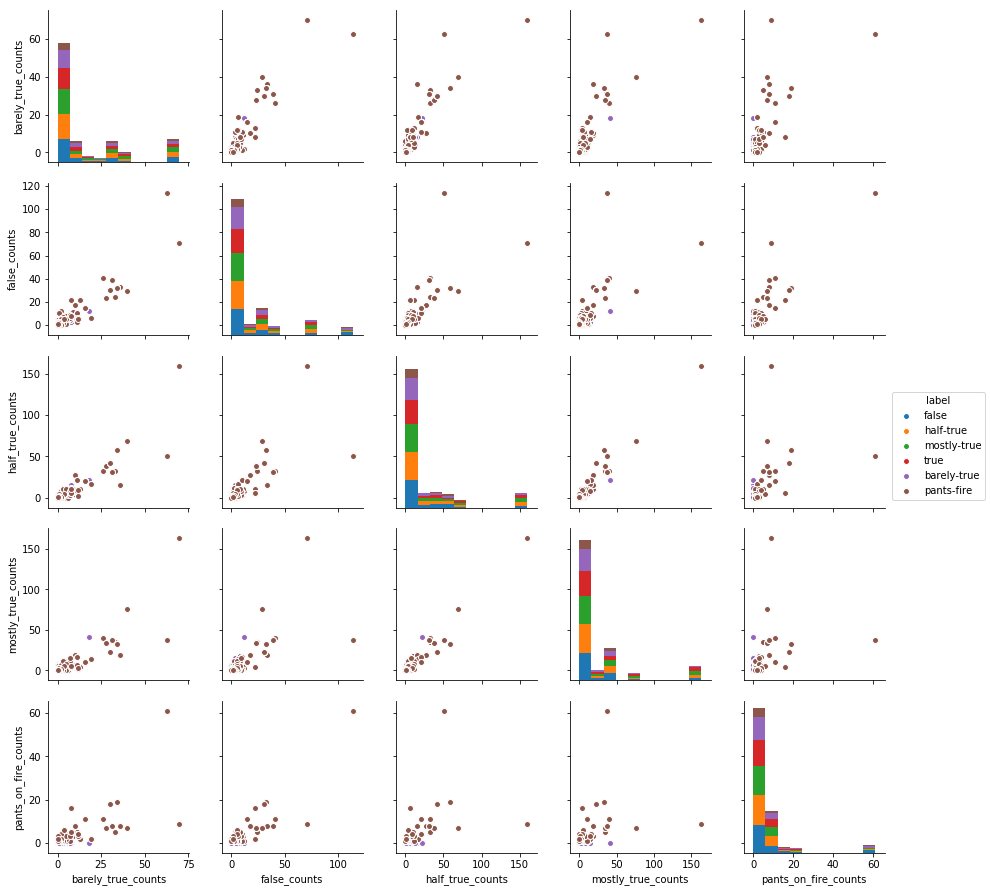

In [112]:
sns.pairplot(dataset.dropna(), hue='label')

**Party affiliation and labels - relations**

To check relations between two categorical attributes, cross table is good idea:

In [113]:
party_affiliation_label = pd.crosstab(index=dataset.label, columns=dataset.party_affiliation)
party_affiliation_label

party_affiliation,Moderate,activist,business-leader,columnist,constitution-party,democrat,democratic-farmer-labor,education-official,government-body,green,...,liberal-party-canada,libertarian,newsmaker,none,ocean-state-tea-party-action,organization,republican,state-official,talk-show-host,tea-party-member
label,,,,,,,,,,,,,,,,,,,,,
barely-true,0,7,0,5,0,463,0,0,0,0,...,0,4,7,261,1,45,832,1,2,0
false,1,7,1,10,1,511,0,0,0,1,...,0,6,9,326,0,50,1028,1,9,2
half-true,0,9,0,3,0,750,1,0,0,0,...,0,12,11,327,0,59,890,8,6,4
mostly-true,0,11,1,5,0,801,0,2,1,0,...,1,9,11,315,0,24,707,6,0,3
pants-fire,0,0,2,1,0,153,0,0,0,1,...,0,3,3,269,0,17,380,0,4,1
true,0,5,5,11,0,658,0,0,0,1,...,0,6,15,246,0,24,660,4,5,0


Or also heatmap can tell us something valuable:

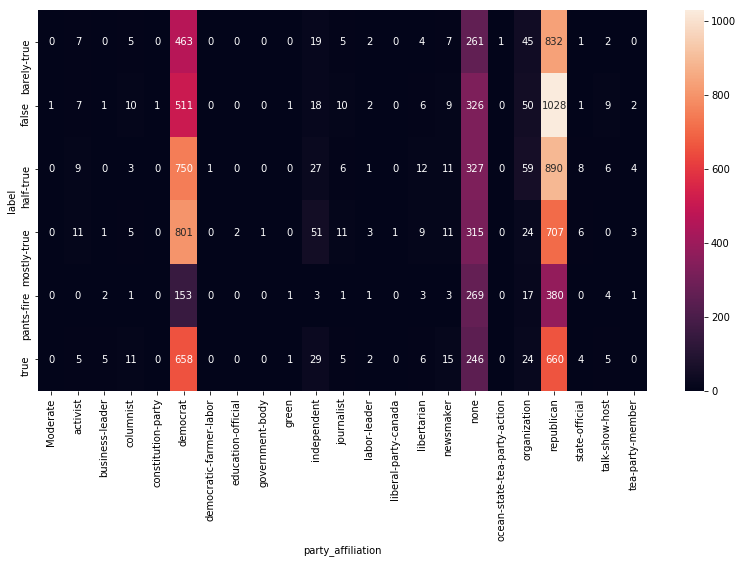

In [114]:
# initialize plot
fig = plt.figure(figsize=(30,7))
ax1 = fig.add_subplot(121)

# add data
sns.heatmap(party_affiliation_label, annot=True, fmt="d")

### 8 OpenSources
Link: [https://github.com/BigMcLargeHuge/opensources](https://github.com/BigMcLargeHuge/opensources)

Professionally curated lists of online sources, available free for public use.

#### 8.0 Attributes
* **site** - site name
* **type** - type of site (bias, ...)
* **2nd type** - second type of site
* **3rd type** - third type of site
* **Source Notes (things to know?)** - some notes

#### 8.1 Read the data

In [116]:
# read data from dataset
dataset = pd.read_csv('opensources/data/data.csv')

#### 8.2 Count of records

In [117]:
len(dataset)

833

#### 8.3 Examples of the data

Check first 5 records:

In [118]:
dataset.head()

,Unnamed: 0,type,2nd type,3rd type,Source Notes (things to know?),Unnamed: 5
0,100percentfedup.com,bias,NaN,NaN,NaN,NaN
1,365usanews.com,bias,conspiracy,NaN,NaN,NaN
2,4threvolutionarywar.wordpress.com,bias,conspiracy,NaN,NaN,NaN
3,aheadoftheherd.com,bias,NaN,NaN,"false quotes regarding banking, heavily promot...",NaN
4,americablog.com,bias,clickbait,NaN,domain for sale,NaN


Check last 5 records:

In [119]:
dataset.tail()

,Unnamed: 0,type,2nd type,3rd type,Source Notes (things to know?),Unnamed: 5
828,weaselzippers.us,unreliable,bias,NaN,copies/pastes quotes/bits from news orgs and o...,NaN
829,whowhatwhy.com,unreliable,NaN,NaN,NaN,NaN
830,wikileaks.com,unreliable,,,https://www.nytimes.com/2017/03/09/opinion/the...,NaN
831,wikileaks.org,unreliable,,NaN,Increasingly wikileaks is being accused of spr...,
832,WolfStreet.com,unreliable,NaN,NaN,NaN,NaN


In our data is column that stores URL of pages, but is called **Unnamed: 0**. Rename it to **site** will be a good idea:

In [120]:
dataset = dataset.rename(columns={'Unnamed: 0': 'site'})

#### 8.4 More information about the data

Check datatypes of columns in the data:

In [121]:
dataset.dtypes

site                              object
type                              object
2nd type                          object
3rd type                          object
Source Notes (things to know?)    object
Unnamed: 5                        object
dtype: object

Datatype 'object' means, that the data at that column contain string or other datatype, which can't be used in machine learning without other feature transformation.

In [122]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 6 columns):
site                              833 non-null object
type                              833 non-null object
2nd type                          369 non-null object
3rd type                          98 non-null object
Source Notes (things to know?)    264 non-null object
Unnamed: 5                        3 non-null object
dtypes: object(6)
memory usage: 39.1+ KB


Check some interesting values for each column:

In [123]:
dataset.describe(include='all')

,site,type,2nd type,3rd type,Source Notes (things to know?),Unnamed: 5
count,833,833,369,98,264,3
unique,825,16,18,13,132,2
top,madworldnews.com,fake,bias,bias,http://www.politifact.com/punditfact/article/2...,
freq,3,235,79,20,111,2


#### 8.5 NULL values in the data

Are there any null values in our dataset?

In [124]:
dataset.isnull().values.any()

True

Look for the count of null values per column:

In [125]:
dataset.isnull().sum()

site                                0
type                                0
2nd type                          464
3rd type                          735
Source Notes (things to know?)    569
Unnamed: 5                        830
dtype: int64

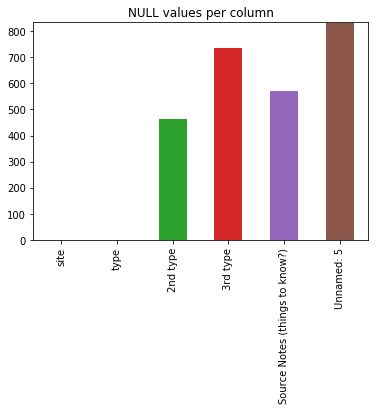

In [126]:
dataset.isnull().sum().plot(kind='bar', ylim=(0, len(dataset)), title='NULL values per column')

We can see that last column is always empty. Let's remove it:

In [127]:
dataset = dataset.drop(columns=['Unnamed: 5'])

#### 8.6 Looking at attributes

#### Type
At first, check what types are available:

In [128]:
dataset.type.unique()

array(['bias', 'clickbait', 'conspiracy', 'Conspiracy', 'fake', 'fake ',
       'fake news', 'hate', 'junksci', 'satire', 'political', 'reliable',
       'rumor', 'rumor ', 'state', 'unreliable'], dtype=object)

In [129]:
dataset['2nd type'].unique()

array([nan, 'conspiracy', 'clickbait', ' ', 'unreliable', 'rumor', 'fake',
       'fake news', 'political', 'blog', 'hate', 'state', 'satire',
       'bias', 'junksci', 'Fake', 'satirical', 'reliable', 'unrealiable'],
      dtype=object)

In [130]:
dataset['3rd type'].unique()

array([nan, 'bias', ' ', 'clickbait', 'unreliable', 'Political', 'fake',
       'rumor', 'political', 'conspiracy', 'junksci', 'hate', 'satire',
       ' unreliable'], dtype=object)

We can see, there are duplicates of types with different camel-case syntax. We need to solve this before checking distribution of labels:

In [131]:
# fix duplicated types in 'type' column
dataset['type'] = dataset['type'].str.lower()
dataset['type'] = dataset['type'].str.strip()
dataset['type'] = dataset['type'].str.replace('fake news', 'fake')

# fix duplicated types in '2nd type' column
dataset['2nd type'] = dataset['2nd type'].str.lower()
dataset['2nd type'] = dataset['2nd type'].str.strip()
dataset['2nd type'] = dataset['2nd type'].str.replace('fake news', 'fake')

# fix duplicated types in '3rd type' column
dataset['3rd type'] = dataset['3rd type'].str.lower()
dataset['3rd type'] = dataset['3rd type'].str.strip()
dataset['3rd type'] = dataset['3rd type'].str.replace('fake news', 'fake')

Check values after correction:

In [132]:
dataset.type.unique()

array(['bias', 'clickbait', 'conspiracy', 'fake', 'hate', 'junksci',
       'satire', 'political', 'reliable', 'rumor', 'state', 'unreliable'],
      dtype=object)

In [133]:
dataset['2nd type'].unique()

array([nan, 'conspiracy', 'clickbait', '', 'unreliable', 'rumor', 'fake',
       'political', 'blog', 'hate', 'state', 'satire', 'bias', 'junksci',
       'satirical', 'reliable', 'unrealiable'], dtype=object)

In [134]:
dataset['3rd type'].unique()

array([nan, 'bias', '', 'clickbait', 'unreliable', 'political', 'fake',
       'rumor', 'conspiracy', 'junksci', 'hate', 'satire'], dtype=object)

Data are correct now. Let's analyse distribution.

What is the distribution of sites labels?

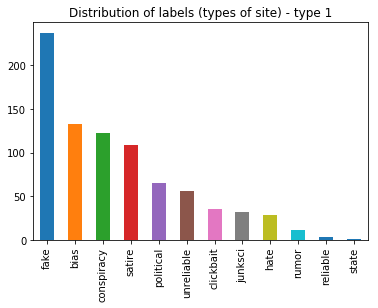

In [135]:
dataset.type.dropna().value_counts().plot(kind='bar', title='Distribution of labels (types of site) - type 1')

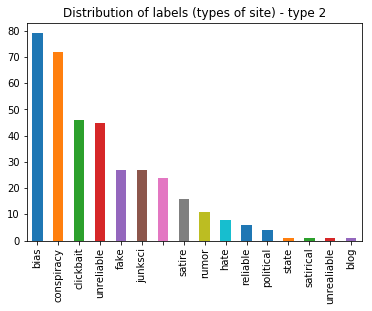

In [136]:
dataset['2nd type'].dropna().value_counts().plot(kind='bar', title='Distribution of labels (types of site) - type 2')

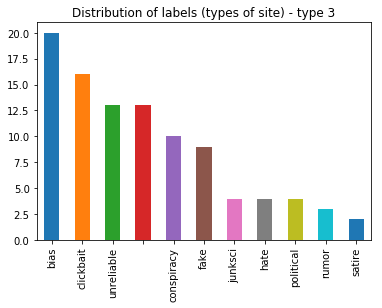

In [137]:
dataset['3rd type'].dropna().value_counts().plot(kind='bar', title='Distribution of labels (types of site) - type 3')

### 9 FakeNewsCorpus
Link: [https://github.com/several27/FakeNewsCorpus](https://github.com/several27/FakeNewsCorpus)

This is an open source dataset composed of millions of news articles mostly scraped from a curated list of 1001 domains from http://www.opensources.co/. Because the list does not contain many reliable websites, additionally NYTimes and WebHose English News Articles articles has been included to better balance the classes. Corpus is mainly intended for use in training deep learning algorithms for purpose of fake news recognition. The dataset is still work in progress and for now, the public version includes only 9,408,908 articles (745 out of 1001 domains).

**Remember, that analysis below is just a sample, whole dataset contains millions of records!!!**

#### 9.0 Attributes

* **id** - id of record
* **domain** - domain, where message was scraped from
* **type** - type of message (fake, bias, ...)
* **url** - full url address of new
* **content** - content of the new
* **scraped_at** - date, when the new was scraped
* **inserted_at** - *maybe, when was the article published?*
* **updated_at**
* **title** - title of the new
* **authors** - authors of the new
* **keywords** - keywords
* **meta_keywords** - meta keywords
* **meta_description** - meta description
* **tags** - tags
* **summary** - summary of the new
* **source (opensources, nytimes, or webhose)**

#### 9.1 Read the data

In [142]:
# read data from dataset
df = pd.read_csv('fake_news_corpus/data/data.csv')

#### 9.2 Count of records

In [143]:
len(df)

250

#### 9.3 Examples of the data

Check first 5 records:

In [144]:
df.head()

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary
0,0,141,awm.com,unreliable,http://awm.com/church-congregation-brings-gift...,Sometimes the power of Christmas will make you...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Church Congregation Brings Gift to Waitresses ...,Ruth Harris,NaN,[''],NaN,NaN,NaN
1,1,256,beforeitsnews.com,fake,http://beforeitsnews.com/awakening-start-here/...,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,Zurich Times,NaN,[''],NaN,NaN,NaN
2,2,700,cnnnext.com,unreliable,http://www.cnnnext.com/video/18526/never-hike-...,Never Hike Alone: A Friday the 13th Fan Film U...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Never Hike Alone - A Friday the 13th Fan Film ...,NaN,NaN,[''],Never Hike Alone: A Friday the 13th Fan Film ...,NaN,NaN
3,3,768,awm.com,unreliable,http://awm.com/elusive-alien-of-the-sea-caught...,"When a rare shark was caught, scientists were ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Elusive ‘Alien Of The Sea ‘ Caught By Scientis...,Alexander Smith,NaN,[''],NaN,NaN,NaN
4,4,791,bipartisanreport.com,clickbait,http://bipartisanreport.com/2018/01/21/trumps-...,Donald Trump has the unnerving ability to abil...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Trump’s Genius Poll Is Complete & The Results ...,Gloria Christie,NaN,[''],NaN,NaN,NaN


Check last 5 records:

In [145]:
df.tail()

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary
245,245,39259,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2017/12/priso...,"Prison for Rahm, God’s Work And Many Others\n\...",2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"Prison for Rahm, God’s Work And Many Others",NaN,NaN,[''],NaN,NaN,NaN
246,246,39468,beforeitsnews.com,fake,http://beforeitsnews.com/diy/2017/11/4-useful-...,4 Useful Items for Your Tiny Home\n\nHeadline:...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,4 Useful Items for Your Tiny Home,Dimitry K,NaN,[''],NaN,NaN,NaN
247,247,39477,www.newsmax.com,NaN,https://www.newsmax.com/politics/michael-hayde...,Former CIA Director Michael Hayden said Thursd...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Michael Hayden: We Should Be 'Frightened' by T...,Todd Beamon,NaN,"['michael hayden', 'sthole countries', 'daca',...",President Donald Trump's reported remarks abou...,"Homeland Security, Trump Administration, Immig...",NaN
248,248,39550,www.newsmax.com,NaN,https://www.newsmax.com/newsfront/antonio-saba...,Antonio Sabato Jr. says Hollywood's liberal el...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Antonio Sabato Jr.: It's Oprah or Bust for Hol...,Bill Hoffmann,NaN,"['antonio sabato jr', 'oprah winfrey', 'presid...",Antonio Sabato Jr. says Hollywood's liberal el...,"Trump Administration, ISIS/Islamic State, News...",NaN
249,249,39558,www.newsmax.com,NaN,https://www.newsmax.com/newsfront/bill-clinton...,Former U.S. President Bill Clinton on Monday c...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Bill Clinton Calls for Release of Reuters Jour...,NaN,NaN,"['bill clinton', 'myanmar', 'calls', 'release'...",Former U.S. President Bill Clinton Calls for R...,"Donald Trump, Russia, Trump Administration, Gu...",NaN


#### 9.4 More information about the data

In [146]:
df.dtypes

Unnamed: 0            int64
id                    int64
domain               object
type                 object
url                  object
content              object
scraped_at           object
inserted_at          object
updated_at           object
title                object
authors              object
keywords            float64
meta_keywords        object
meta_description     object
tags                 object
summary             float64
dtype: object

Datatype 'object' means, that the data at that column contain string or other datatype, which can't be used in machine learning without other feature transformation.

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 16 columns):
Unnamed: 0          250 non-null int64
id                  250 non-null int64
domain              250 non-null object
type                238 non-null object
url                 250 non-null object
content             250 non-null object
scraped_at          250 non-null object
inserted_at         250 non-null object
updated_at          250 non-null object
title               250 non-null object
authors             170 non-null object
keywords            0 non-null float64
meta_keywords       250 non-null object
meta_description    54 non-null object
tags                27 non-null object
summary             0 non-null float64
dtypes: float64(2), int64(2), object(12)
memory usage: 31.3+ KB


Check some interesting values for each column:

In [148]:
df.describe(include='all')

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary
count,250.000000,250.000000,250,238,250,250,250,250,250,250,170,0.0,250,54,27,0.0
unique,NaN,NaN,29,10,250,239,2,1,1,248,109,NaN,36,51,24,NaN
top,NaN,NaN,beforeitsnews.com,fake,http://beforeitsnews.com/food-and-farming/2016...,How To Easily Understand The Difference Betwee...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Contributors,John Rolls,NaN,[''],"News, Politics, Editorials, commentary, Canada...","Donald Trump, Russia, Trump Administration, Gu...",NaN
freq,NaN,NaN,155,155,1,9,197,250,250,2,10,NaN,211,4,3,NaN
mean,124.500000,20241.560000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,72.312977,11515.412728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,141.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,62.250000,11033.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,124.500000,21065.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,186.750000,29073.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 9.5 NULL values in the data

Are there any null values in our dataset?

In [149]:
df.isnull().values.any()

True

Look for the count of null values per column:

In [150]:
df.isnull().sum()

Unnamed: 0            0
id                    0
domain                0
type                 12
url                   0
content               0
scraped_at            0
inserted_at           0
updated_at            0
title                 0
authors              80
keywords            250
meta_keywords         0
meta_description    196
tags                223
summary             250
dtype: int64

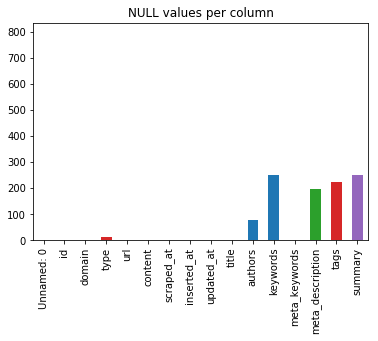

In [151]:
df.isnull().sum().plot(kind='bar', ylim=(0, len(dataset)), title='NULL values per column')

#### 9.6 Looking at attributes

**Type**

At first, check what labels are available:

In [152]:
df.type.unique()

array(['unreliable', 'fake', 'clickbait', 'conspiracy', 'reliable',
       'bias', 'hate', 'junksci', 'political', nan, 'unknown'],
      dtype=object)

Check distribution of types:

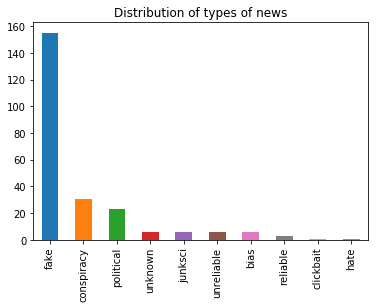

In [153]:
df.type.dropna().value_counts().plot(kind='bar', title='Distribution of types of news')

### 10 FakeNewsNet

Link: [https://github.com/KaiDMML/FakeNewsNet](https://github.com/KaiDMML/FakeNewsNet)

This directory includes two fake news dataset that contain both the news contents and social context information. The fake news ground truth are collected from two platforms: BuzzFeed and PolitiFact. For each platform, there are Fake and Real news divided into two directories, containing json files.

All files are included in *fake_news_net/data* folder.

### 11 HoaxDataset

Link: [https://cs.stanford.edu/~srijan/hoax/](https://cs.stanford.edu/~srijan/hoax/)

This dataset contains publicly available hoax articles and non-hoax articles that were created on Wikipedia.

Data of this dataset are HTML files with pages from Wikipedia, so they are not analysed as other datasets, but at least this dataset is mentioned with link, where to find data.

All files are included in *hoax_dataset/data* folder.